Installing Libraries

In [1]:
!pip install pandas numpy scikit-learn matplotlib


Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score


Sample Dataset Creation

In [3]:
data = {
    "vehicles": [20, 35, 50, 70, 90, 120, 150, 200, 250, 300, 350, 400],
    "peak_hour": [0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1],  # 1 = Peak time, 0 = Normal
    "rain": [0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1],        # 1 = Rainy, 0 = Normal
    "green_signal_time": [25, 30, 35, 50, 60, 70, 75, 90, 45, 55, 80, 95]  # Target(seconds)
}

df = pd.DataFrame(data)
df


,vehicles,peak_hour,rain,green_signal_time
0,20,0,0,25
1,35,0,0,30
2,50,0,1,35
3,70,1,1,50
4,90,1,0,60
5,120,1,0,70
6,150,1,1,75
7,200,1,0,90
8,250,0,0,45
9,300,0,1,55


from matplotlib import pyplot as plt
df['vehicles'].plot(kind='hist', bins=20, title='vehicles')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['peak_hour'].plot(kind='hist', bins=20, title='peak_hour')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['rain'].plot(kind='hist', bins=20, title='rain')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['green_signal_time'].plot(kind='hist', bins=20, title='green_signal_time')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='vehicles', y='peak_hour', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='peak_hour', y='rain', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='rain', y='green_signal_time', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['vehicles']
  ys = series['peak_hour']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('vehicles', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('vehicles')
_ = plt.ylabel('peak_hour')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['vehicles']
  ys = series['rain']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('vehicles', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('vehicles')
_ = plt.ylabel('rain')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['vehicles']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'vehicles'}, axis=1)
              .sort_values('vehicles', ascending=True))
  xs = counted['vehicles']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('vehicles', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('vehicles')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['green_signal_time']
  ys = series['peak_hour']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('green_signal_time', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('green_signal_time')
_ = plt.ylabel('peak_hour')

from matplotlib import pyplot as plt
df['vehicles'].plot(kind='line', figsize=(8, 4), title='vehicles')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['peak_hour'].plot(kind='line', figsize=(8, 4), title='peak_hour')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['rain'].plot(kind='line', figsize=(8, 4), title='rain')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['green_signal_time'].plot(kind='line', figsize=(8, 4), title='green_signal_time')
plt.gca().spines[['top', 'right']].set_visible(False)

Training ML Model

In [4]:
X = df[["vehicles", "peak_hour", "rain"]]
y = df["green_signal_time"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

pred = model.predict(X_test)


Evaluating Model

In [5]:
print("Mean Absolute Error:", mean_absolute_error(y_test, pred))
print("R2 Score:", r2_score(y_test, pred))


Mean Absolute Error: 5.6048397330152575
R2 Score: 0.8676947079059114


Predicting and Optimized Signal Time

In [7]:
vehicles = 180       # number of vehicles detected
peak_hour = 1        # 1 = YES, 0 = NO
rain = 0             # 1 = YES, 0 = NO

input_data = np.array([[vehicles, peak_hour, rain]])
predicted_time = model.predict(input_data)

print("Optimized Green Signal Time Should Be:", round(predicted_time[0], 2), "seconds")


Optimized Green Signal Time Should Be: 75.68 seconds


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Visualizing Results

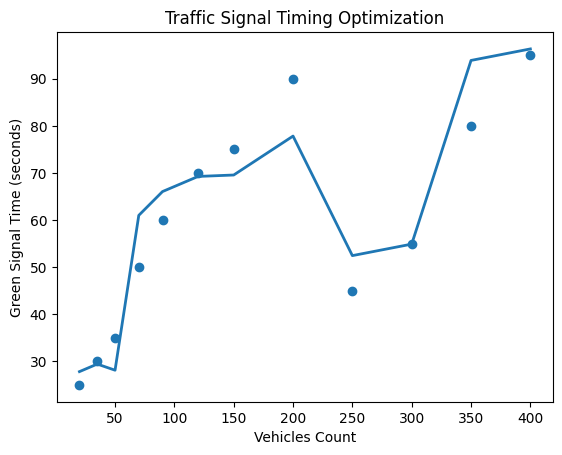

In [8]:
plt.scatter(df["vehicles"], df["green_signal_time"])
plt.plot(df["vehicles"], model.predict(df[["vehicles","peak_hour","rain"]]), linewidth=2)
plt.xlabel("Vehicles Count")
plt.ylabel("Green Signal Time (seconds)")
plt.title("Traffic Signal Timing Optimization")
plt.show()
